In [1]:
sample_name = 'beorn_d2'                    # name of the chip in the fridge
db_name = '20220608_sc_s21_meas.db'   # name of the database
user = 'sc'                               # who is performing measurements

<h3>Basic imports</h3>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from resonator_tools import circuit

import qcodes as qc
from qcodes import initialise_database, load_by_run_spec
from qcodes.dataset.plotting import plot_by_id

import scipy.optimize

db_path  = os.path.join(r'D:\QMET' + '\\' + sample_name + '\\', db_name)

<h2>Data loading</h2>

In [23]:
RUN_ID = 16 #15 , 16
qc.initialise_or_create_database_at(db_path)
dataset = qc.load_by_run_spec( captured_run_id=RUN_ID)
print(dataset)

s21_dict = dataset.to_pandas_dataframe_dict()

#plt.plot(f, phi)

vna_2dtrce_adV0_f377_phigh-5dBm #16@D:\QMET\beorn_d2\20220608_sc_s21_meas.db
----------------------------------------------------------------------------
mw_source_power - numeric
ZNB20_S21_S21_frequency - numeric
ZNB20_S21_magnitude - numeric
ZNB20_S21_phase - numeric


In [24]:
s21_dict['ZNB20_S21_magnitude']

ZNB20_S21_magnitude
mw_source_power ZNB20_S21_S21_frequency                     
-25.0           3.765000e+09                        0.008315
                3.765004e+09                        0.008260
                3.765008e+09                        0.008289
                3.765012e+09                        0.008326
                3.765016e+09                        0.008332
...                                                      ...
-5.0            3.774984e+09                        0.000878
                3.774988e+09                        0.000874
                3.774992e+09                        0.000874
                3.774996e+09                        0.000849
                3.775000e+09                        0.000877

[5002000 rows x 1 columns]

In [25]:

# f = s21_dict['ZNB20_S21_S21_frequency']['ZNB20_S21_S21_frequency'][0:1001]
mag_dict = s21_dict['ZNB20_S21_magnitude'].reset_index()
phi_dict = s21_dict['ZNB20_S21_phase'].reset_index()
mag = mag_dict['ZNB20_S21_magnitude'].to_numpy()
phi = phi_dict['ZNB20_S21_phase'].to_numpy()
pwr = mag_dict['mw_source_power'].to_numpy()
mw_f = mag_dict['ZNB20_S21_S21_frequency'].to_numpy()

In [26]:
N = np.unique(pwr).shape[0]
size = (N,-1)

mag = np.reshape(mag,size)
pwr = np.reshape(pwr, size)
# pwr = np.squeeze(pwr)
mw_f = np.reshape(mw_f, size)
phi = np.reshape(phi, size)

In [27]:
mag.shape

(2000, 2501)

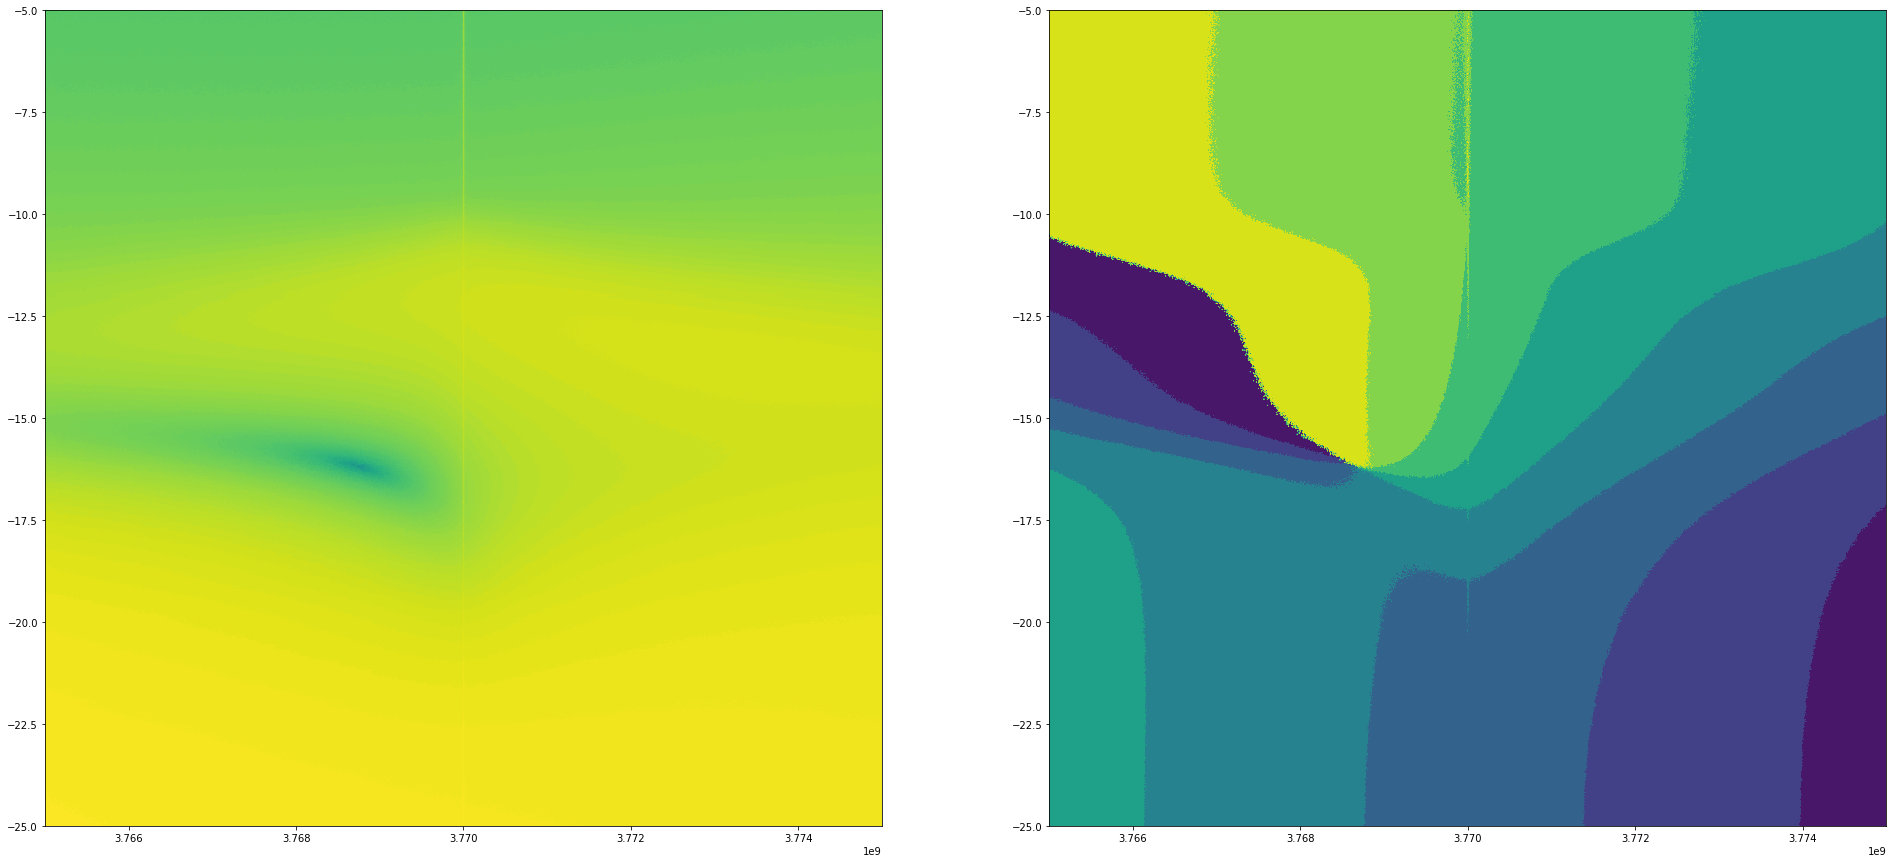

In [28]:
fig = plt.figure(figsize=(30+3,15))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

cp = ax1.contourf(mw_f, pwr, 10*np.log(mag), levels=125)
cp2 = ax2.contourf(mw_f, pwr, phi)

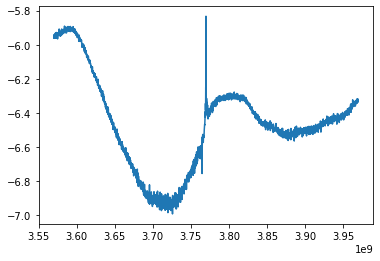

In [22]:
k = 1500
plt.plot(mw_f[k, :],np.log(np.abs(mag))[k, :])

In [21]:
mw_f.shape

(2000, 2501)